# Align Images

Before we do any testing on real images, we must first align our images to match the distribution of FFHQ (the training dataset for StyleGAN)

!!! Attention:
* All of our aligned images will go in **data/images/aligned_images** (no choice is given)
* Original image must be .png file

We can either align a single image or a directory of images, the usage is exactly the same.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 

from PIL import Image

import os
from fastai.data.transforms import get_image_files

path_to_aligned = '/home/data/images/aligned_images'

## 1. Align Single Image

### 1.1 Align Single Image

In [5]:
path_to_single_image = '/home/data/images/seb.png'

In [6]:
!python /home/asya_utils/processing/align_images.py $path_to_single_image

2020-11-06 07:42:03.187261: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2020-11-06 07:42:03.187282: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
successfully aligned /home/data/images/seb.png


### 1.2 View result

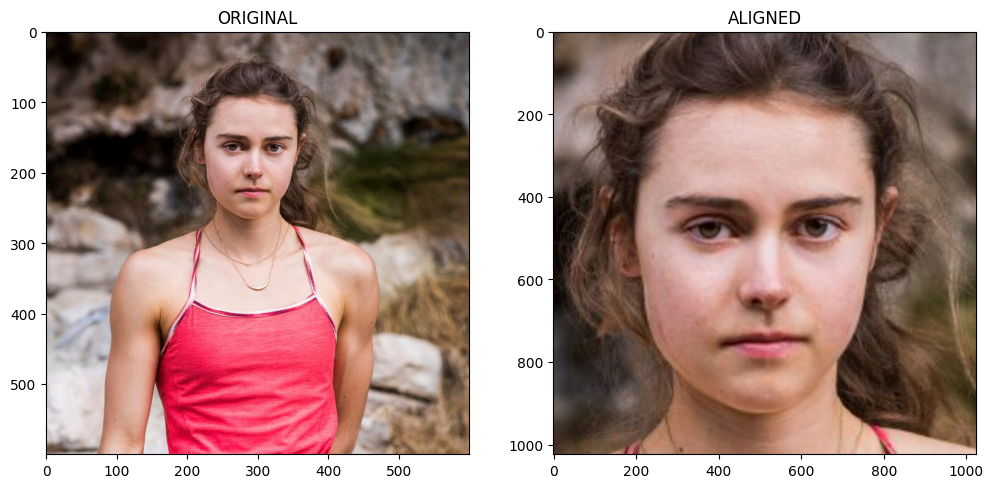

In [80]:
# get images
im_orig = Image.open(path_to_single_image)
n, ext = os.path.splitext(os.path.basename(path_to_single_image))
aligned_path = n + '_01' + ext
im_aligned = Image.open(os.path.join(path_to_aligned, aligned_path))

# plot
f, axarr = plt.subplots(1,2)
axarr[0].imshow(im_orig)
axarr[0].set_title("ORIGINAL")
axarr[1].imshow(im_aligned)
axarr[1].set_title("ALIGNED")
plt.show()

# 2. Align Directory of Images

### 2.1 Align

In [81]:
im_dir = '/home/data/images/test_images'

In [84]:
!python /home/asya_utils/processing/align_images.py $im_dir

2020-09-26 18:39:27.795733: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2020-09-26 18:39:27.795750: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
successfully aligned /home/data/images/test_images/marguerite.png
successfully aligned /home/data/images/test_images/sonia.png
successfully aligned /home/data/images/test_images/paola.png
successfully aligned /home/data/images/test_images/cristian.png


### 2.2 View Result

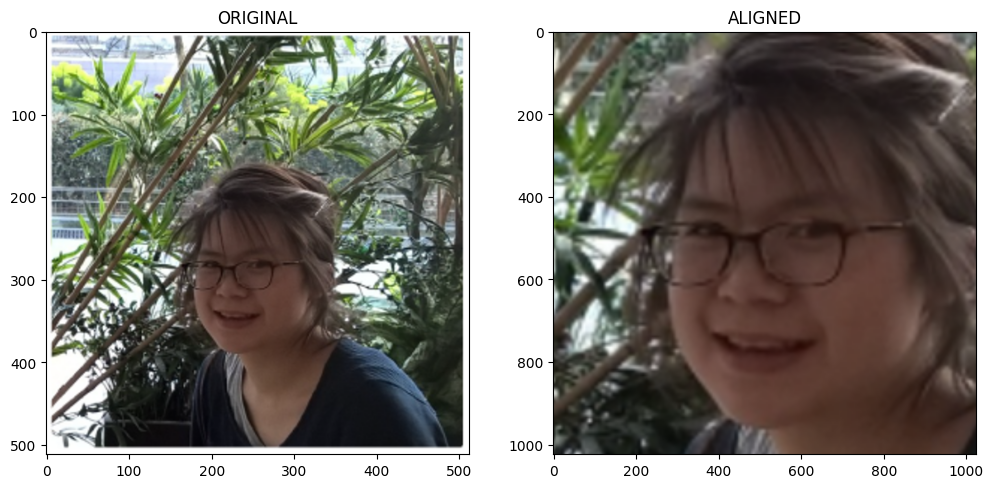

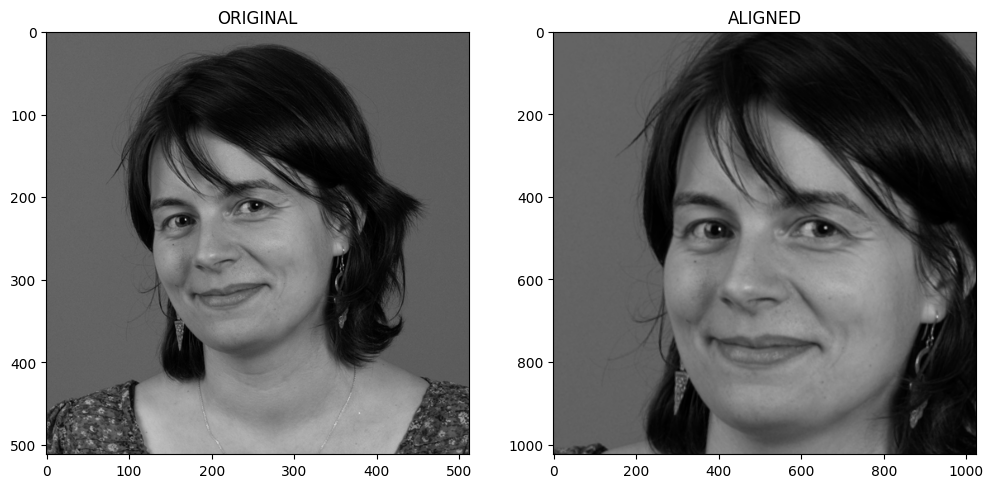

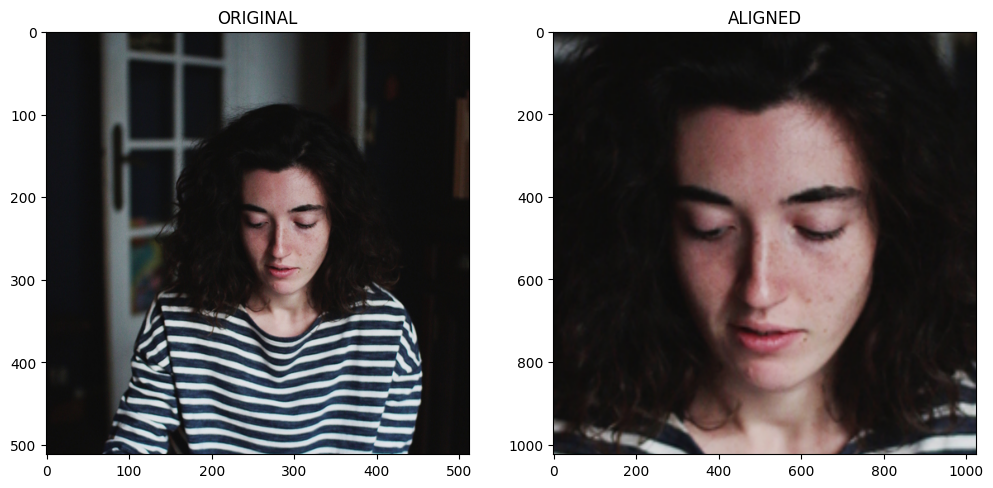

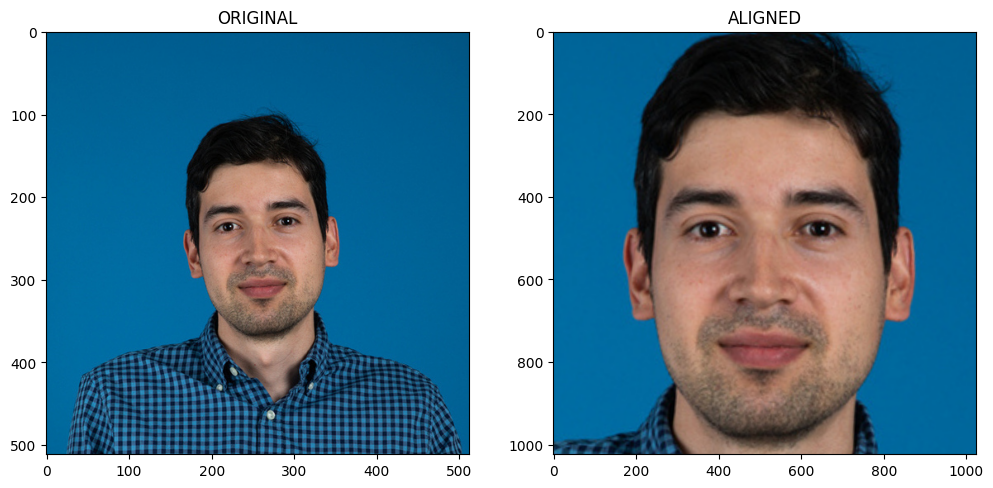

In [86]:
for im in get_image_files(im_dir):
    
    path_to_single_image = os.path.join(im_dir, im)
    
    
    n, ext = os.path.splitext(os.path.basename(path_to_single_image))
    aligned_path = n + '_01' + ext
    
    path_to_aligned_image = os.path.join(path_to_aligned, aligned_path)
    
    im_o = Image.open(path_to_single_image)
    if not os.path.exists(path_to_aligned_image):
        print("Error, could not align image", path_to_single_image)
        continue
    
    im_a = Image.open(path_to_aligned_image)
    
    # plot
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(im_o)
    axarr[0].set_title("ORIGINAL")
    axarr[1].imshow(im_a)
    axarr[1].set_title("ALIGNED")
    plt.show()